<a href="https://colab.research.google.com/github/Cris12Mainz/Topological-Defects/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import standard python libraries
import os, urllib, io
from datetime import datetime
import numpy as np

In [2]:
# import the PyTorch deep learning library
import torch, torchvision
import torch.nn.functional as F
from torch import nn, optim
from torch.autograd import Variable

In [3]:
# import sklearn classification evaluation library
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
# import matplotlib, seaborn, and PIL data visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [5]:
# import the Google Colab GDrive connector
from google.colab import drive

# mount GDrive inside the Colab notebook
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
 # create data sub-directory inside the Colab Notebooks directory
data_dir = '/content/drive/MyDrive/Topological_Defects'
if not os.path.exists(data_dir): os.makedirs(data_dir)

In [7]:
import os
import glob

#create training dir
training_dir = os.path.join(data_dir,"training")
if not os.path.isdir(training_dir):
  os.mkdir(training_dir)

#create defect in training
defect_training_dir = os.path.join(training_dir,"defect")
if not os.path.isdir(defect_training_dir):
  os.mkdir(defect_training_dir)

#create nodefect in training
neutro_training_dir = os.path.join(training_dir,"neutro")
if not os.path.isdir(neutro_training_dir):
  os.mkdir(neutro_training_dir)

#create validation dir
validation_dir = os.path.join(data_dir,"validation")
if not os.path.isdir(validation_dir):
  os.mkdir(validation_dir)

#create defect in validation
defect_validation_dir = os.path.join(validation_dir,"defect")
if not os.path.isdir(defect_validation_dir):
  os.mkdir(defect_validation_dir)

#create nodefect in validation
neutro_validation_dir = os.path.join(validation_dir,"neutro")
if not os.path.isdir(neutro_validation_dir):
  os.mkdir(neutro_validation_dir)

In [21]:
#now we have to shuffle the images and divide it between the train and validation
import shutil

split_size = 0.70
nodefect_imgs_size = len(glob.glob("/content/drive/MyDrive/Topological_Defects/data/neutro*"))
defect_imgs_size = len(glob.glob("/content/drive/MyDrive/Topological_Defects/data/defect*"))

for i,img in enumerate(glob.glob("/content/drive/MyDrive/Topological_Defects/data/neutro*")):
  if i < (nodefect_imgs_size * split_size):
    shutil.move(img,neutro_training_dir)
  else:
    shutil.move(img,neutro_validation_dir)

for i,img in enumerate(glob.glob("/content/drive/MyDrive/Topological_Defects/data/defect*")):
  if i < (defect_imgs_size * split_size):
    shutil.move(img,defect_training_dir)
  else:
    shutil.move(img,defect_validation_dir)

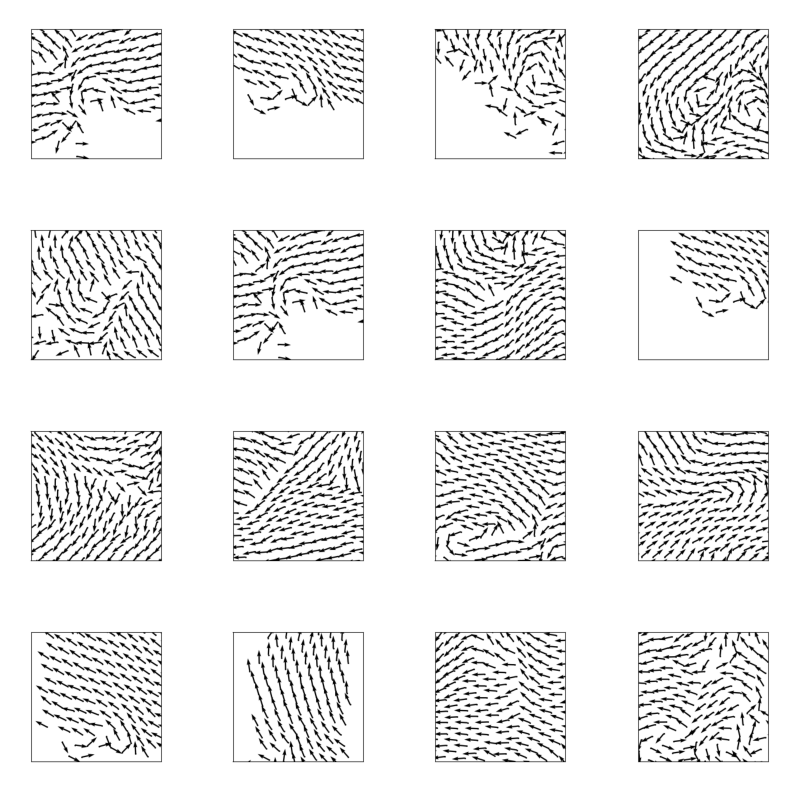

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from IPython.core.pylabtools import figsize

samples_defect = [os.path.join(defect_training_dir,np.random.choice(os.listdir(defect_training_dir),1)[0]) for _ in range(8)]
samples_neutro = [os.path.join(neutro_training_dir,np.random.choice(os.listdir(neutro_training_dir),1)[0]) for _ in range(8)]

nrows = 4
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize = (10,10))
ax = ax.flatten()

for i in range(nrows*ncols):
  if i < 8:
    pic = plt.imread(samples_defect[i%8])
    ax[i].imshow(pic)
    ax[i].set_axis_off()
  else:
    pic = plt.imread(samples_neutro[i%8])
    ax[i].imshow(pic)
    ax[i].set_axis_off()
plt.show()

In [9]:
classes = ['defect', 'neutro']

In [10]:
traindir = "/content/drive/MyDrive/Topological_Defects/training"
validir = "/content/drive/MyDrive/Topological_Defects/validation"

In [11]:
transf = torchvision.transforms.Compose([torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [16]:
train_data = torchvision.datasets.ImageFolder(traindir,transform=transf)
test_data = torchvision.datasets.ImageFolder(validir,transform=transf)                                             f)


In [17]:
print(len(train_data))

276


In [18]:
print(len(test_data))

68


In [25]:
# set (random) image id
image_id = 54

# retrieve image exhibiting the image id
train_data[image_id]

(tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]],
 
         [[1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          ...,
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.],
          [1., 1., 1.,  ..., 1., 1., 1.]]]),
 1)

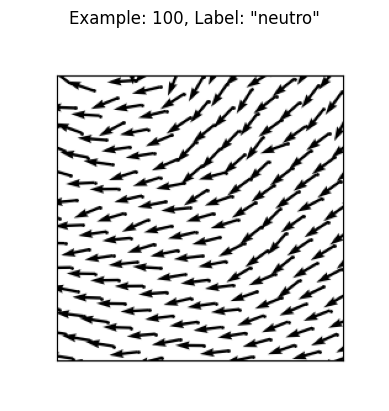

In [39]:
# define tensor to image transformation
image_id = 100
train_image, train_label = train_data[image_id]

trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: "{}"'.format(str(image_id), str(classes[train_label])))
plt.axis('off')

# un-normalize cifar 10 image sample
train_image_plot = train_image / 2.0 + 0.5
#train_image_plot = train_image
# plot 10 image sample
plt.imshow(trans(train_image_plot))

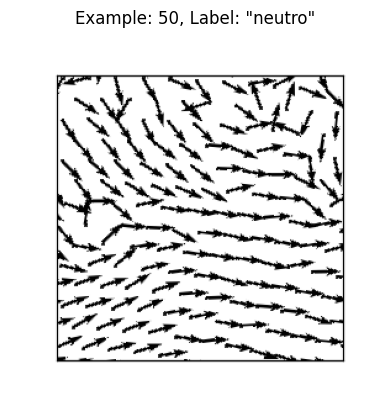

In [38]:
# define tensor to image transformation
image_id = 50
test_image, test_label = test_data[image_id]

trans = torchvision.transforms.ToPILImage()

# set image plot title
plt.title('Example: {}, Label: "{}"'.format(str(image_id), str(classes[train_label])))
plt.axis('off')
# un-normalize cifar 10 image sample
#test_image_plot = test_image / 2.0 + 0.5
test_image_plot = test_image
# plot 10 image sample
plt.imshow(trans(test_image_plot))

Neural Network Implementation